In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 3.7 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 1.2 MB 30.8 MB/s 
     |████████████████████████████████| 186 kB 51.1 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 51 kB 335 kB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [ ]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [6]:
sevens = (path/'train'/'7').ls().sorted()
threes = (path/'train'/'3').ls().sorted()
sevens, threes

((#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...],
 (#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...])

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [ ]:
im3_tensor = tensor(im3)
type(im3_tensor), len(im3_tensor)

(torch.Tensor, 28)

In [7]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(seven_tensors), len(three_tensors)

(6265, 6131)

In [8]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
len(stacked_sevens), len(stacked_threes)

(6265, 6131)

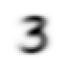

In [ ]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

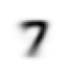

In [ ]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

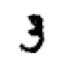

In [ ]:
# l1 norm 
sample_3_image = stacked_threes[0]
show_image(sample_3_image)

In [9]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_7_tens.shape, valid_3_tens.shape

(torch.Size([1028, 28, 28]), torch.Size([1010, 28, 28]))

In [ ]:
def l1Norm(tensor1, tensor2):
  return (tensor1 - tensor2).abs().mean((-1,-2))

In [ ]:
l1Norm(mean3, sample_3_image), l1Norm(mean7, sample_3_image)

(tensor(0.1074), tensor(0.1441))

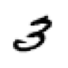

In [ ]:
image = valid_3_tens[0]
show_image(image)

In [ ]:
new_image = torch.flatten(image)
new_image.shape

torch.Size([784])

In [ ]:
t = torch.tensor([[[1, 2],
              [3, 4]],
              [[5, 6],
              [7, 8]]])

In [ ]:
t.shape

torch.Size([2, 2, 2])

In [ ]:
torch.flatten(t,start_dim=0, end_dim=1)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [ ]:
torch.flatten(t, start_dim=1)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

In [ ]:
torch.flatten(t, start_dim=2)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [ ]:
# math functions
def f(x): return (2*x**2).sum()

In [ ]:
# the parameters
xt = torch.tensor([1,2,3,4,5]).float().requires_grad_()
# 
yt = f(xt)
yt

tensor(110., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()

In [ ]:
xt.grad

tensor([ 4.,  8., 12., 16., 20.])

In [ ]:
gradient = xt.grad

In [ ]:
learning_rate = 0.01
gradient*learning_rate

tensor([0.0400, 0.0800, 0.1200, 0.1600, 0.2000])

In [ ]:
time = torch.arange(20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

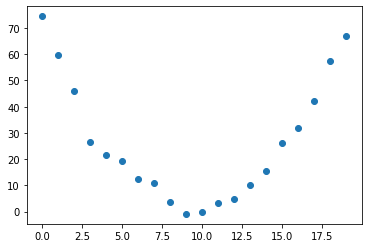

In [ ]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [ ]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

In [ ]:
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

In [ ]:
params = torch.randn(3).requires_grad_()

In [ ]:
orig_params = params.clone()

In [ ]:
preds = f(time, params)
preds

tensor([ 1.3526e+00, -1.5861e-01, -3.1915e+00, -7.7462e+00, -1.3823e+01, -2.1421e+01, -3.0541e+01, -4.1182e+01, -5.3346e+01, -6.7031e+01, -8.2238e+01, -9.8966e+01, -1.1722e+02, -1.3699e+02,
        -1.5828e+02, -1.8110e+02, -2.0544e+02, -2.3129e+02, -2.5868e+02, -2.8758e+02], grad_fn=<AddBackward0>)

In [ ]:
def show_preds(preds, ax=None):
  if ax is None: ax = plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300,100)

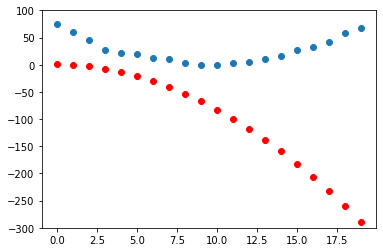

In [ ]:
show_preds(preds)

In [ ]:
loss = mse(preds, speed)
loss

tensor(159.8727, grad_fn=<SqrtBackward>)

In [ ]:
loss.backward()
params.grad

tensor([-165.4921,  -10.6388,   -0.7902])

In [ ]:
params

tensor([-0.7642, -0.7505,  1.3526], requires_grad=True)

In [ ]:
orig_params

tensor([-0.7658, -0.7506,  1.3525], grad_fn=<CloneBackward>)

In [ ]:
lr = 1e-5
params.data -= lr * params.grad
params.grad = None

In [ ]:
preds = f(time, params)
mse(preds, speed)

tensor(159.5977, grad_fn=<SqrtBackward>)

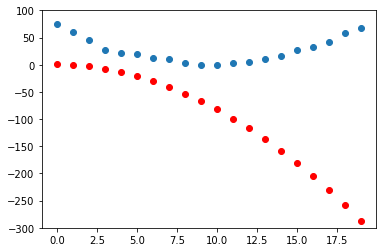

In [ ]:
show_preds(preds)

In [ ]:
loss = mse(preds, speed)
loss.backward()


In [ ]:
def optimize():
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  lr = 1e-3
  params.data -= lr * params.grad
  params.grad = None

In [ ]:
for _ in range(100):
  optimize()

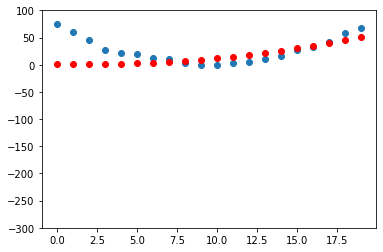

In [ ]:
preds = f(time, params)
show_preds(preds)

In [10]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_x.shape

torch.Size([12396, 784])

In [11]:
train_y = torch.tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

In [12]:
train_y.shape

torch.Size([12396, 1])

In [13]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

In [14]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = torch.tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_set = list(zip(valid_x, valid_y))

In [15]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [16]:
weigths = init_params((28*28,1))
bias = init_params(1)

In [17]:
(train_x[0]*weigths.T).sum() + bias

tensor([-6.2330], grad_fn=<AddBackward0>)

In [18]:
def linear1(xb): return xb@weigths + bias

In [19]:
preds = linear1(train_x)
preds[:10]

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        [-17.8700],
        [ -1.3607],
        [  1.4861],
        [ -4.8140],
        [-15.2588],
        [ -1.3656],
        [-24.8612]], grad_fn=<SliceBackward>)

In [20]:
corrects = (preds > 0.5).float() == train_y
corrects[:10]

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False]])

In [21]:
corrects.float().mean().item()

0.5355759859085083

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


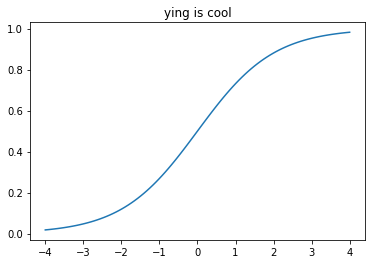

In [22]:
plot_function(torch.sigmoid, title='ying is cool', min=-4, max=4)

In [23]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [24]:
coll = list(range(15))
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [25]:
weigths = init_params((28*28, 1))
bias = init_params(1)

In [26]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [27]:
valid_dl = DataLoader(valid_set, batch_size=256)

In [28]:
mini_batch = train_x[:4]
preds = linear1(mini_batch)
preds

tensor([[15.7077],
        [18.6850],
        [16.2143],
        [17.4726]], grad_fn=<AddBackward0>)

In [29]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(5.9605e-08, grad_fn=<MeanBackward0>)

In [30]:
loss.backward()
mini_batch.grad

In [ ]:
weigths.grad

In [32]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()
  

In [34]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  corrects = (preds > 0.5) == yb
  return corrects.float().mean()

In [35]:
batch_accuracy(mini_batch, train_y[:4])

tensor(0.2152)

In [36]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb, yb in dl]
  return round(torch.stack(accs).mean().item(), 4)

In [37]:
validate_epoch(linear1)

0.5478

In [38]:
lr = 1e-3
params = weigths, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.5489

In [39]:
for i in range(300):
  train_epoch(linear1, lr, params)
  acc = validate_epoch(linear1)
  if i % 10 == 0:
    print(f'epoh {i}: {acc}')
  

epoh 0: 0.5495
epoh 10: 0.5584
epoh 20: 0.5679
epoh 30: 0.5813
epoh 40: 0.5961
epoh 50: 0.6136
epoh 60: 0.6353
epoh 70: 0.6626
epoh 80: 0.6929
epoh 90: 0.719
epoh 100: 0.7431
epoh 110: 0.7604
epoh 120: 0.778
epoh 130: 0.7912
epoh 140: 0.8003
epoh 150: 0.8094
epoh 160: 0.8168
epoh 170: 0.8243
epoh 180: 0.8314
epoh 190: 0.8368
epoh 200: 0.8408
epoh 210: 0.8454
epoh 220: 0.8488
epoh 230: 0.8518
epoh 240: 0.8548
epoh 250: 0.8577
epoh 260: 0.8601
epoh 270: 0.8624
epoh 280: 0.8643
epoh 290: 0.866


In [65]:
class BasicOptim:
  def __init__(self, params, lr): self.params,self.lr = list(params),lr

  def step(self, *args, **kwargs):
    for p in params: p.data -= p.grad * self.lr
  
  def zero_grad(self, *args, **kwargs):
    for p in params: p.grad.zero_()

In [ ]:
linear_model = nn.Linear(28*28,1)
opt = BasicOptim(linear_model.parameters(), lr)

In [41]:
def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

0.5165

In [42]:
def train_model(model, epochs, by=10):
  for i in range(epochs):
    train_epoch(model)
    acc = validate_epoch(model)
    if i % by == 0:
      print(f'Epoch {i}: {acc}')

In [ ]:
train_model(linear_model, 100)

Epoch 0: 0.5165
Epoch 10: 0.5165
Epoch 20: 0.5165
Epoch 30: 0.5165
Epoch 40: 0.5165
Epoch 50: 0.5165
Epoch 60: 0.5165
Epoch 70: 0.5165
Epoch 80: 0.5165
Epoch 90: 0.5165


In [ ]:
lr

0.001

In [50]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)

In [47]:
validate_epoch(linear_model)

0.9708

In [49]:
linear_model(train_x[-5:])

tensor([[-4.0942],
        [-3.9039],
        [-3.6660],
        [-2.3532],
        [-3.7315]], grad_fn=<AddmmBackward>)

In [51]:
dls = DataLoaders(dl, valid_dl)

In [53]:
learn = Learner(dls, nn.Linear(28*28, 1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [54]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.516277,0.502853,0.432287,00:00
1,0.502227,0.482173,0.707556,00:00
2,0.485965,0.461782,0.854269,00:00
3,0.468349,0.441897,0.903337,00:00
4,0.450122,0.422685,0.922964,00:00
5,0.431826,0.404271,0.936703,00:00
6,0.413826,0.386740,0.944063,00:00
7,0.396362,0.370144,0.947988,00:00
8,0.379595,0.354507,0.950932,00:00
9,0.363626,0.339831,0.952895,00:00


In [64]:
def simple_net(xb):
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 + b2
  return res

In [56]:
w1 = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params((30, 1))
b2 = init_params(1)

In [59]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [66]:
opt = BasicOptim((w1, w2, b1, b2), lr)

In [67]:
learn = Learner(dls, simple_net, loss_func=mnist_loss, opt_func=opt, lr=lr, metrics=batch_accuracy)

In [68]:
learn.fit(10)

AttributeError: ignored

In [69]:
train_model(simple_net, 10, 1)

Epoch 0: 0.4835
Epoch 1: 0.4835
Epoch 2: 0.4835
Epoch 3: 0.4835
Epoch 4: 0.4835
Epoch 5: 0.4835
Epoch 6: 0.4835
Epoch 7: 0.4835
Epoch 8: 0.4835
Epoch 9: 0.4835
